<br>

## Week 4 - Lab Session: Linear Regression with California Housing Data

Welcome to the Week 4 Lab Session on Linear Regression. This week, we will delve into the fundamentals of linear regression, a crucial technique in predictive modeling. Our primary focus will be on applying linear regression models using the `tidymodels` and `tidyverse` packages in R.

### Dataset: California Housing

For this lab session, we will be using the California Housing dataset, a comprehensive dataset that includes various features of residential homes in California. This dataset is widely used for practicing and understanding regression models due to its rich and detailed attributes.

#### Description of the California Housing Dataset

The California Housing dataset contains detailed information on individual residential properties in California. It includes a variety of features such as the median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude.

#### Where to Find the Dataset

You can find the California Housing dataset within the course materials provided or on various online repositories. Ensure that you have downloaded and unzipped the dataset before the lab session.

### Objectives of the Lab

In this lab session, we will:

1. **Explore the Dataset**: Understand the structure and key variables of the California Housing dataset.
2. **Data Wrangling**: Use `tidyverse` functions to clean and prepare the data for modeling.
3. **Model Building**: Apply linear regression models using the `tidymodels` framework.
4. **Model Evaluation**: Evaluate the performance of our models and interpret the results.

#### Tools and Packages

We will primarily use the following R packages:
- **tidymodels**: A collection of packages for modeling and machine learning using tidyverse principles.
- **tidyverse**: A suite of packages for data manipulation, visualization, and analysis.

Make sure to have these packages installed and loaded before the lab session.

Let's get started with linear regression and discover how we can use the California Housing dataset to build and evaluate predictive models!

<br>

### 1. Loading Libraries and the Housing Dataset 

To begin, we load the necessary packages for this tutorial which include: tidyverse tidymodels and ggplot2.

In [1]:
library(tidyverse)  # data wrangling

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tidyr' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
housing <- read.csv('../Datasets/housing.csv')
housing <- as_tibble(housing)

In [3]:
# loading the ames dataset
slice_head(housing, n = 10)

longitude latitude housing_median_age total_rooms total_bedrooms population
1  -122.23   37.88    41                  880         129            322      
2  -122.22   37.86    21                 7099        1106           2401      
3  -122.24   37.85    52                 1467         190            496      
4  -122.25   37.85    52                 1274         235            558      
5  -122.25   37.85    52                 1627         280            565      
6  -122.25   37.85    52                  919         213            413      
7  -122.25   37.84    52                 2535         489           1094      
8  -122.25   37.84    52                 3104         687           1157      
9  -122.26   37.84    42                 2555         665           1206      
10 -122.25   37.84    52                 3549         707           1551      
   households median_income median_house_value ocean_proximity
1   126       8.3252        452600             NEAR BAY       
2  1138       8.3014        358500             NEAR BAY       
3   177       7.2574        352100             NEAR BAY       
4   219       5.6431        341300             NEAR BAY       
5   259       3.8462        342200             NEAR BAY       
6   193       4.0368        269700             NEAR BAY       
7   514       3.6591        299200             NEAR BAY       
8   647       3.1200        241400             NEAR BAY       
9   595       2.0804        226700             NEAR BAY       
10  714       3.6912        261100             NEAR BAY

In [4]:
glimpse(housing)

Rows: 20,640
Columns: 10
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.2~
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37~
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52,~
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555,~
$ total_bedrooms     <dbl> 129, 1106, 190, 235, 280, 213, 489, 687, 665, 707, ~
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 15~
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714, ~
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6~
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 299~
$ ocean_proximity    <chr> "NEAR BAY", "NEAR BAY", "NEAR BAY", "NEAR BAY", "NE~


In [5]:
dim(housing)

[1] 20640    10

In [6]:
names(housing)

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "total_rooms"        "total_bedrooms"     "population"        
 [7] "households"         "median_income"      "median_house_value"
[10] "ocean_proximity"

<br>

The `housing` dataset contains $10$ variables and $20650$ observations. 


<div class="alert alert-block alert-info" style="background-color:white">

#### Objective: Predict the Sales 

Our objective is to predict the $median \ house |value$ of the House based on a set of features provided. 

</div>

<br>


### Exploring the California Housing Dataset

Our first step in exploring the dataset is to look at the dependent variable `median_house_value`. The goal is to understand its structure and use that information to inform the modeling process.

#### 1. Distribution of the Median House Value

To begin, we will visualize the distribution of the `median_house_value`. This will help us understand the range, central tendency, and spread of the house values in the dataset. Visualizing the distribution can also reveal any potential skewness or outliers that might affect our regression model. We can use histograms or density plots to achieve this.


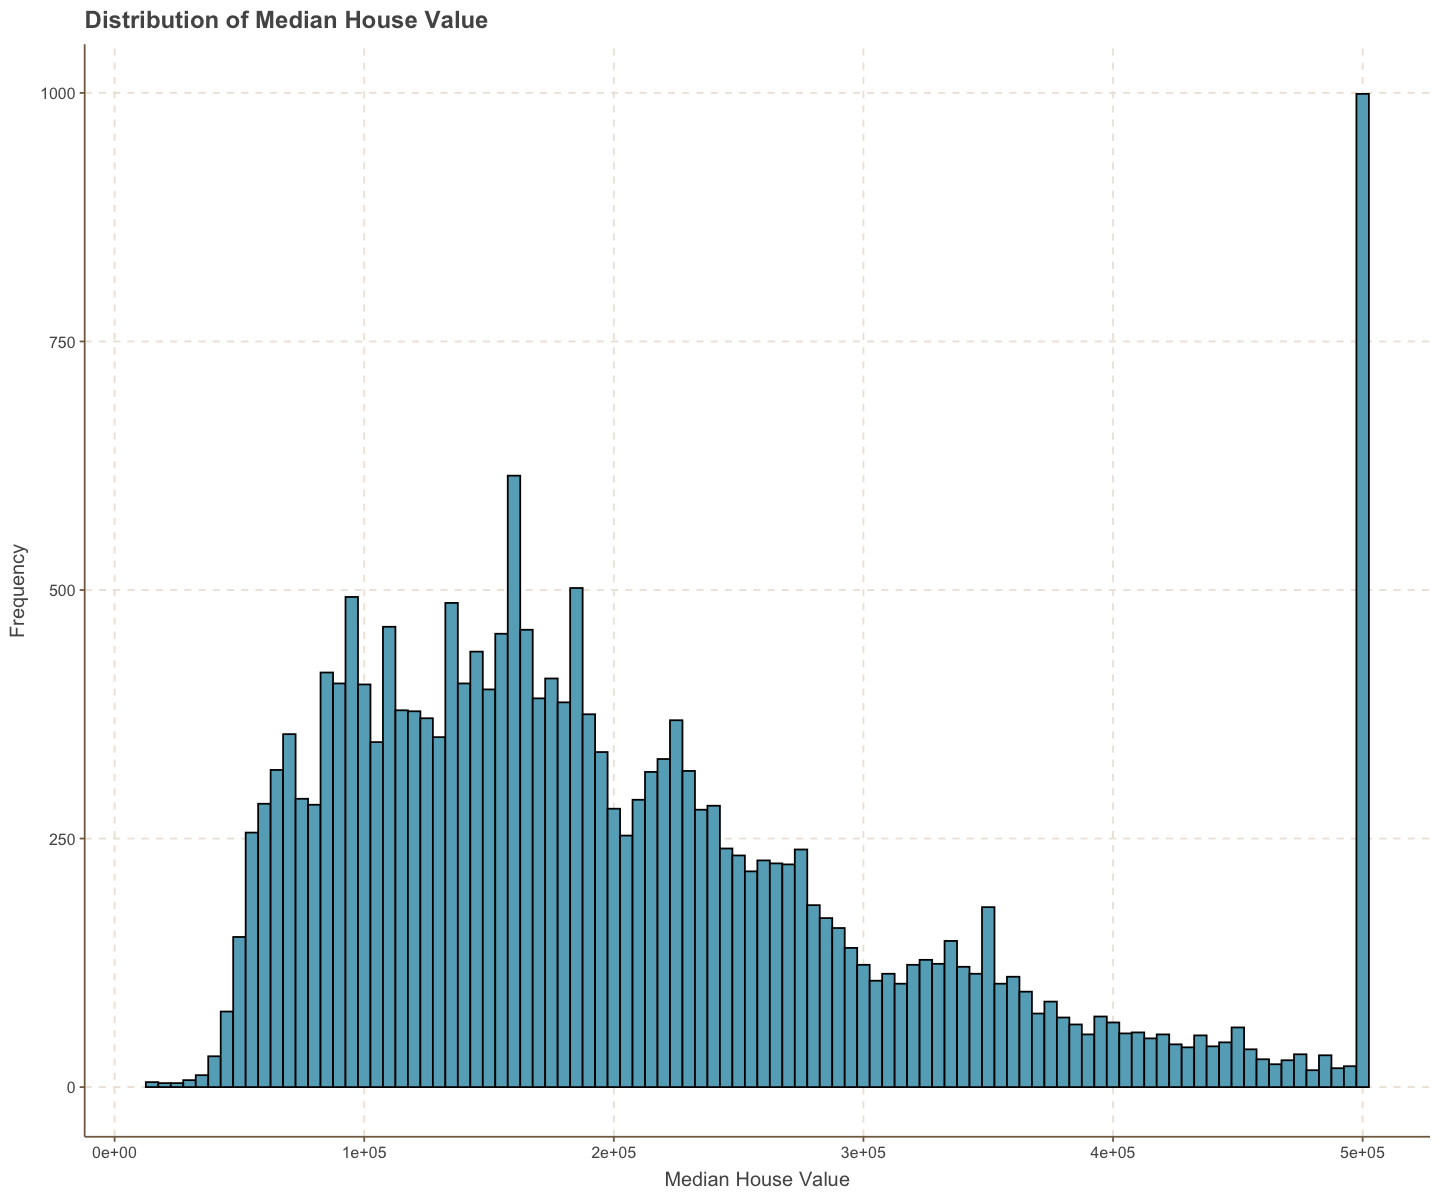

In [7]:
library(ggthemr)
ggthemr('fresh')

options(repr.plot.width = 12, repr.plot.height = 10)

# visualize the distribution of the median_house_value
ggplot( data = housing, aes(x = median_house_value) ) + 
    geom_histogram(  col = 'black', binwidth = 5000) + 
    labs(title = "Distribution of Median House Value", x = "Median House Value", y = "Frequency") 

<br>


<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. The distribution of the `median_house_value` slightly right skewed, with outliers at the highest priced houses. Broadly, a right skewed distribution can be interpreted as there are more inexpensive houses than there are expensive house.

2. Similarly, the housing prices are denominated in large values (in Hundreds of thousands). A tranformation of the values using log transforms could improve modeling results.
  
Note that while tranformation will improve modeling results, there are cost associated with interpretability of both the coefficients and the model fit units such as RMSE or MSE. Since these are based on the difference of $predicted$ vs $actual$ values, the metrics will also be implicitly $log_{10}$.

</div>

<br>


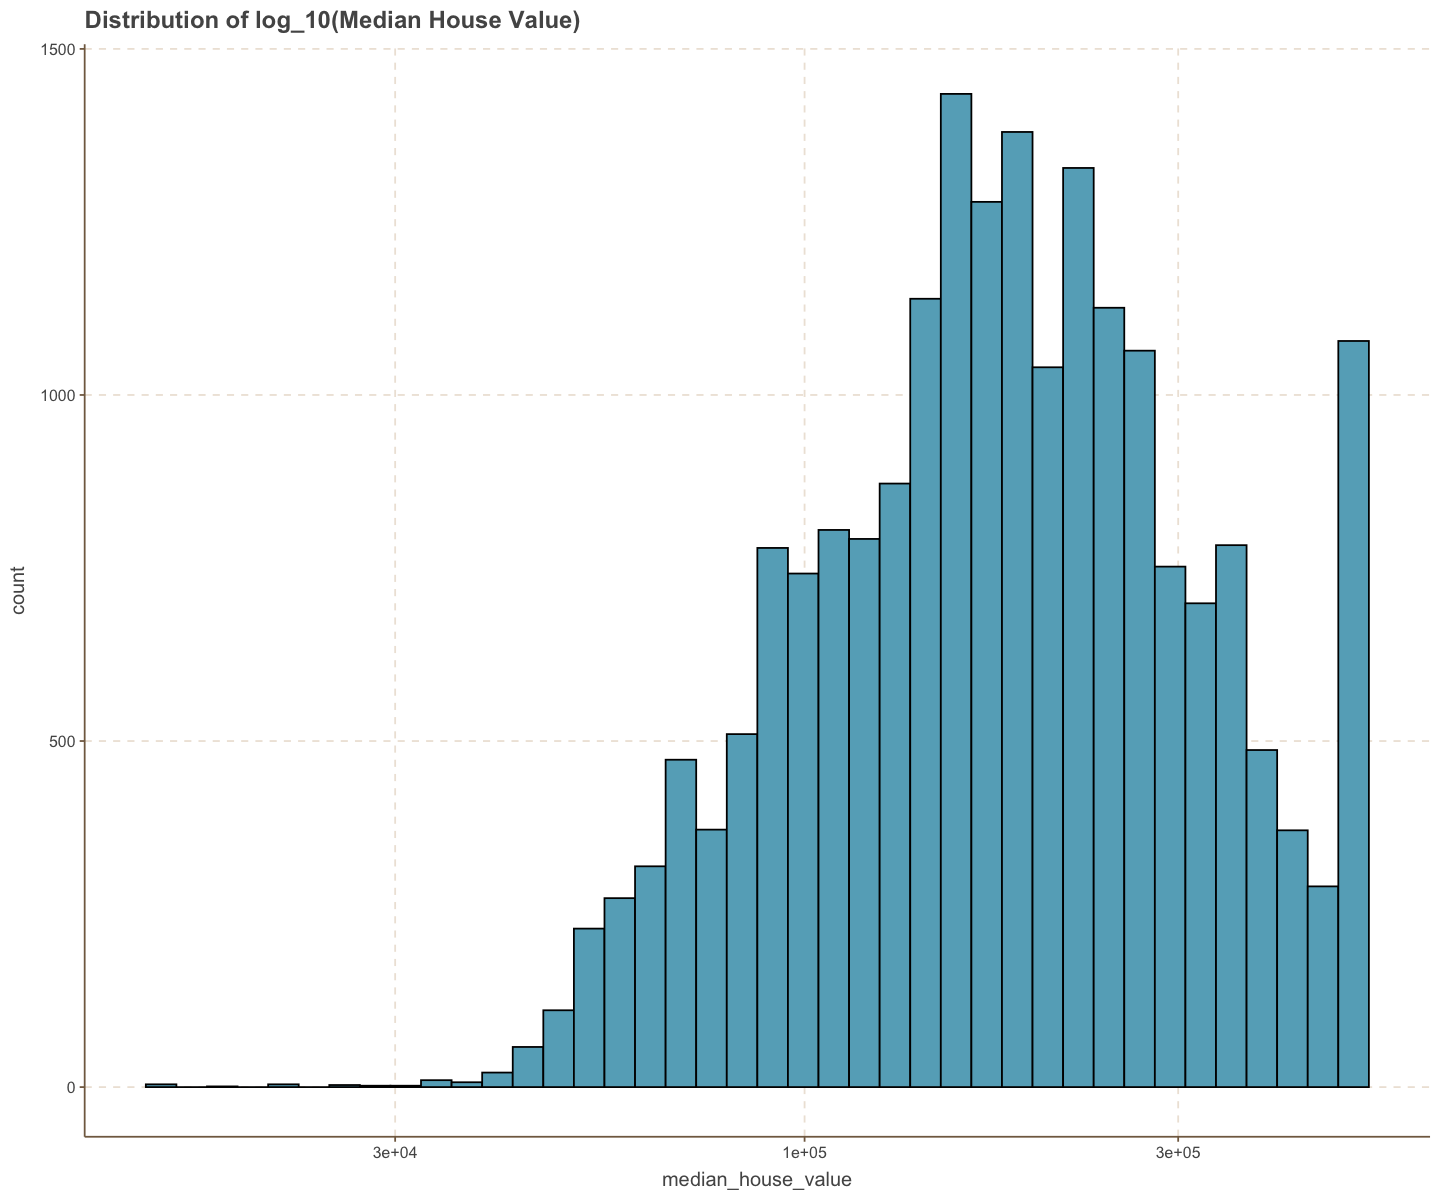

In [8]:
ggplot( data = housing, aes(x = median_house_value) ) + 
    geom_histogram( bins = 40, col = 'black') +
    ggtitle('Distribution of log_10(Median House Value)') + scale_x_log10()

We notice that the log transformation has shifted the distribution to a left-skewed distribution. A choice can be made between using the original values or the log-transformed values, with an understanding of the impact this decision will have on model performance and interpretation.

<br>

### Exploring Dependent Variable against a Sample of Numerical Variables.

There are a number of features that we can use to predict the `Median_House_Value`. Let's look at relationship between Longitude and Latidude and the Price of a Home

Warning message:
"The `scale_name` argument of `continuous_scale()` is deprecated as of ggplot2
3.5.0."


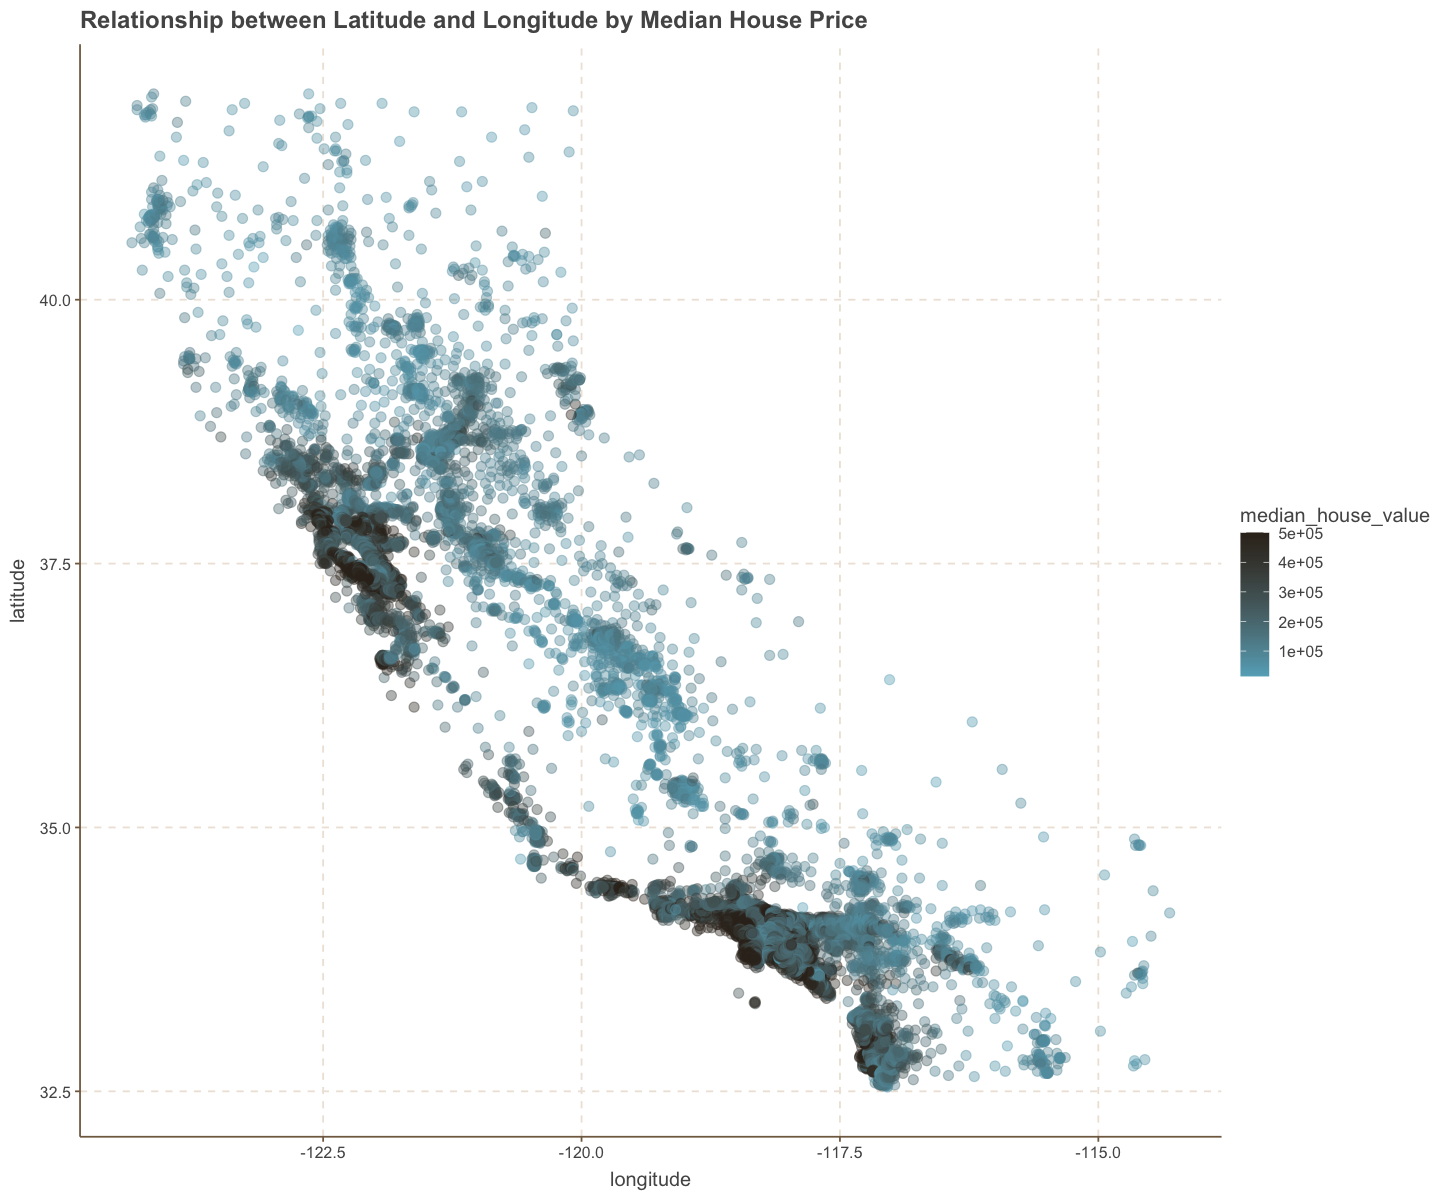

In [9]:
# plotting the scatter plot
ggplot(data = housing, aes( x = longitude, y = latitude, color = median_house_value )) +
      geom_point( size = 2.5, alpha = .4 ) +
      ggtitle('Relationship between Latitude and Longitude by Median House Price')


<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. One useful observation is that the `median_house_value` tends to be higher for homes located on the left side of the `latitude` and `longitude` coordinates, which correspond to the coastal area. This suggests that `ocean_proximity` is an important factor in determining house values.

2. However, it is important to note that not all houses near the coast are more expensive than those further inland. Therefore, we should consider additional factors in our analysis to gain a more comprehensive understanding of house prices.

</div>

<br>


### Relationship Between Population and Median House Value

Now we look at the relationship between Population and Median House Value to determine whether high or low density population determine the value of a home.

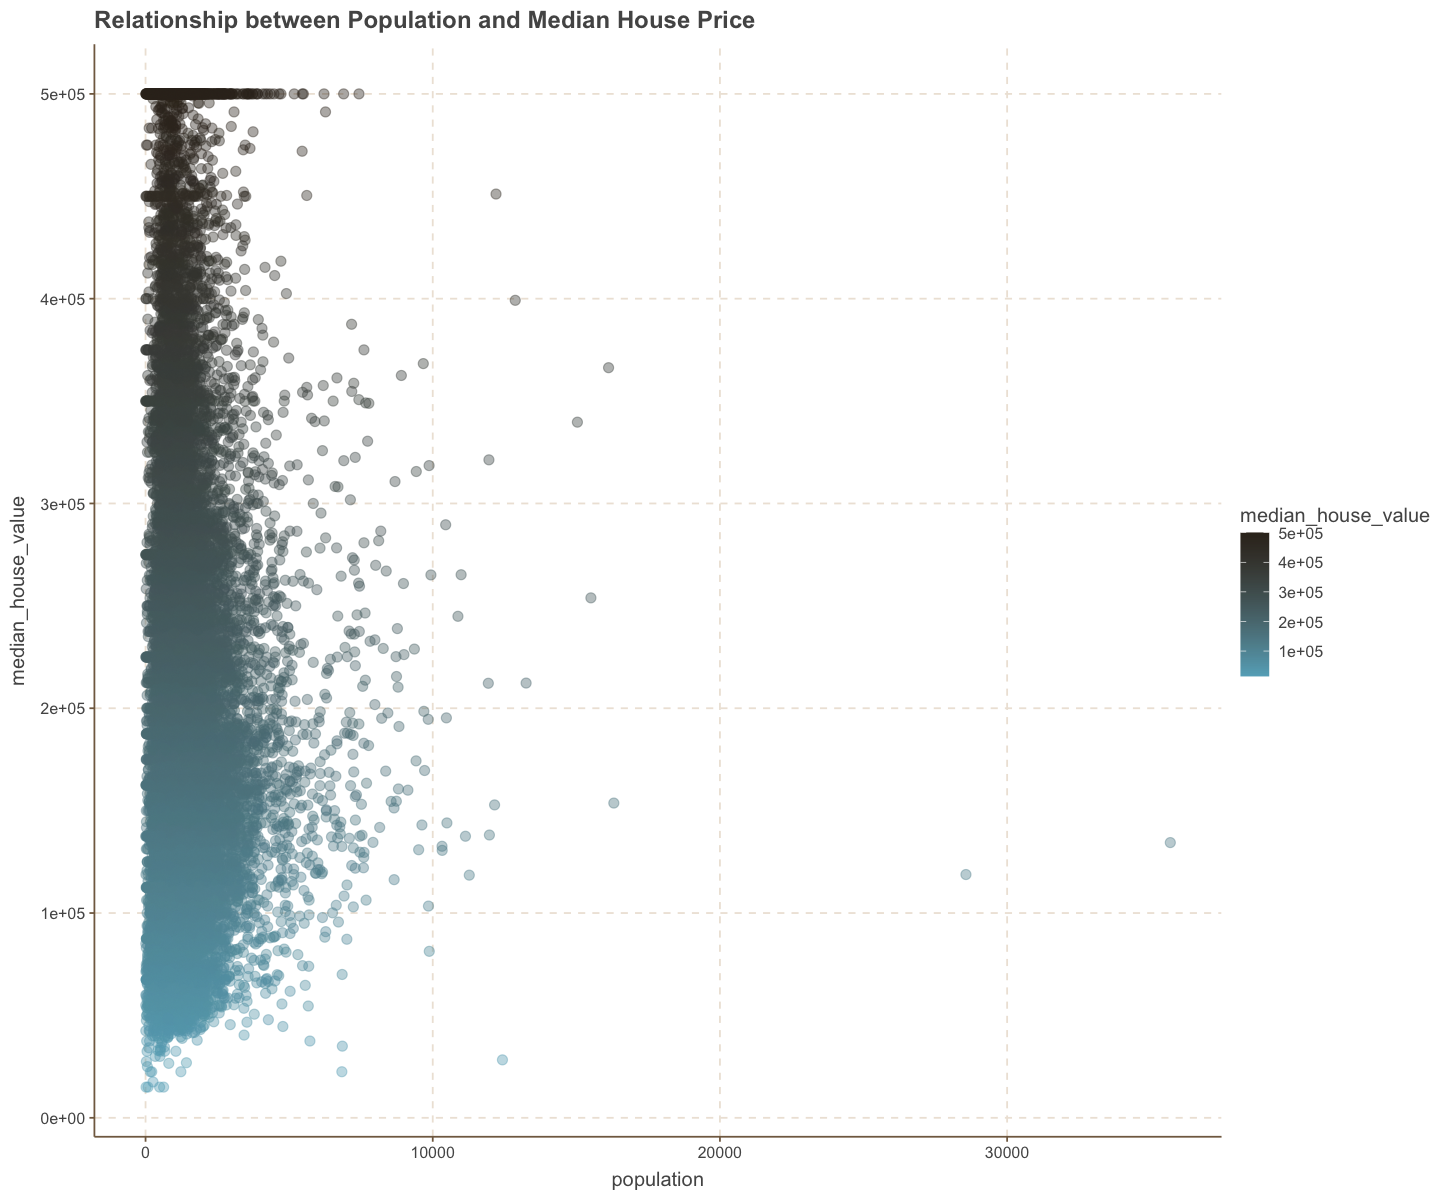

In [10]:
options(repr.plot.width = 12, repr.plot.height = 10)

ggplot(data = housing, aes( x = population, y = median_house_value, color = median_house_value )) +
      geom_point( size = 2.5, alpha = .4 ) +
      ggtitle('Relationship between Population and Median House Price')

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. There is no obvious relationship between the population of an area with the median_house_value variable.

2. We also observe a few outlier points with significant high population numbers. 
</div>

<br>



### Relationship Between Median Income and Median House Value

Now we look at the relationship between Median Income and Median House Value to determine whether the value of a home increases with a rise in median income.

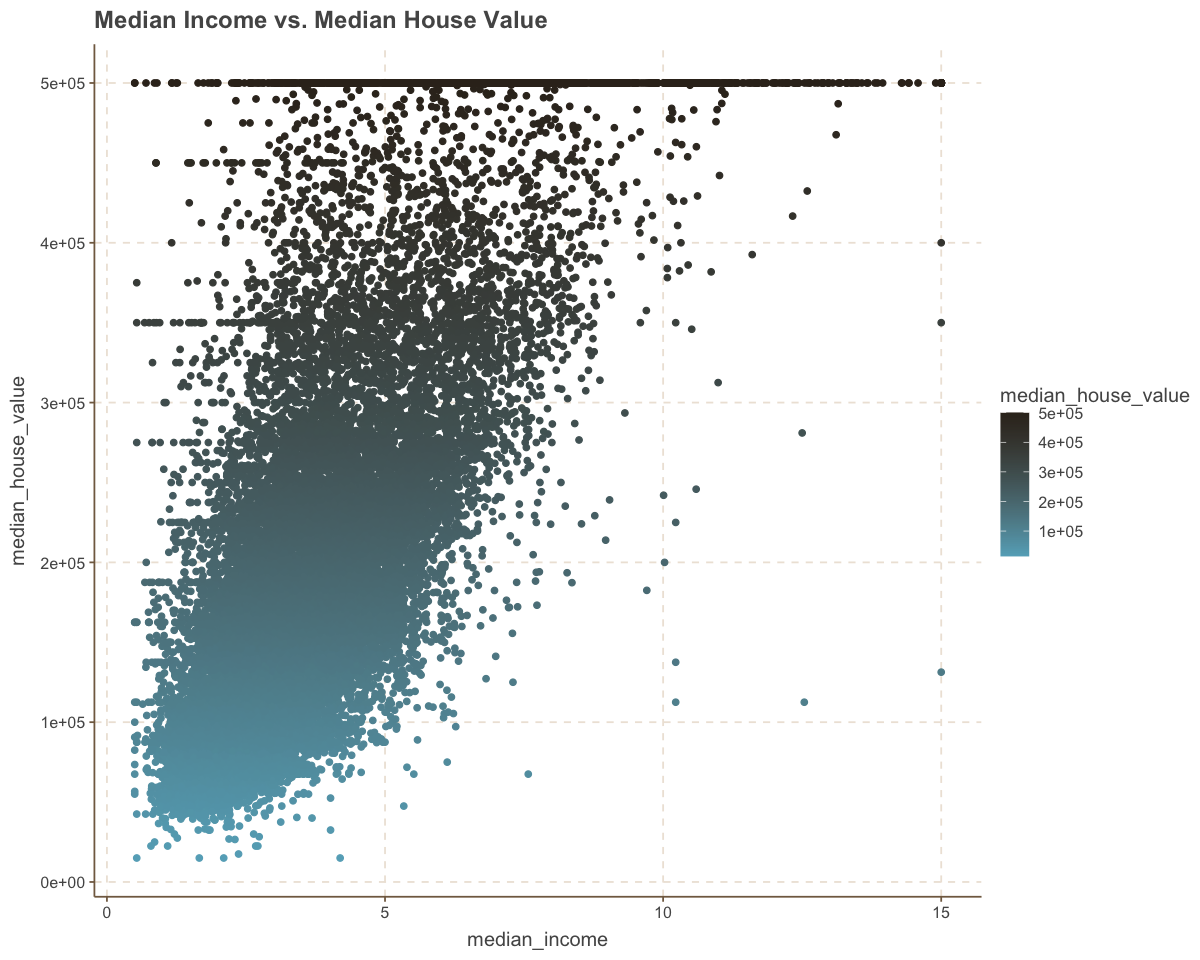

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(housing, aes(x = median_income, y = median_house_value, color = median_house_value)) +
  geom_point(alpha = 2) +   
  ggtitle('Median Income vs. Median House Value')

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. We observe a positive linear relationship between median_income and median_house_value such that neighborhoods with higher median income tend to have higher median_house_value.

</div>

<br>




### Lab Exercise: How would you implement a view of the distribution of House Price by Ocean Proximity and Population

Warning message:
"The `scale_name` argument of `discrete_scale()` is deprecated as of ggplot2
3.5.0."


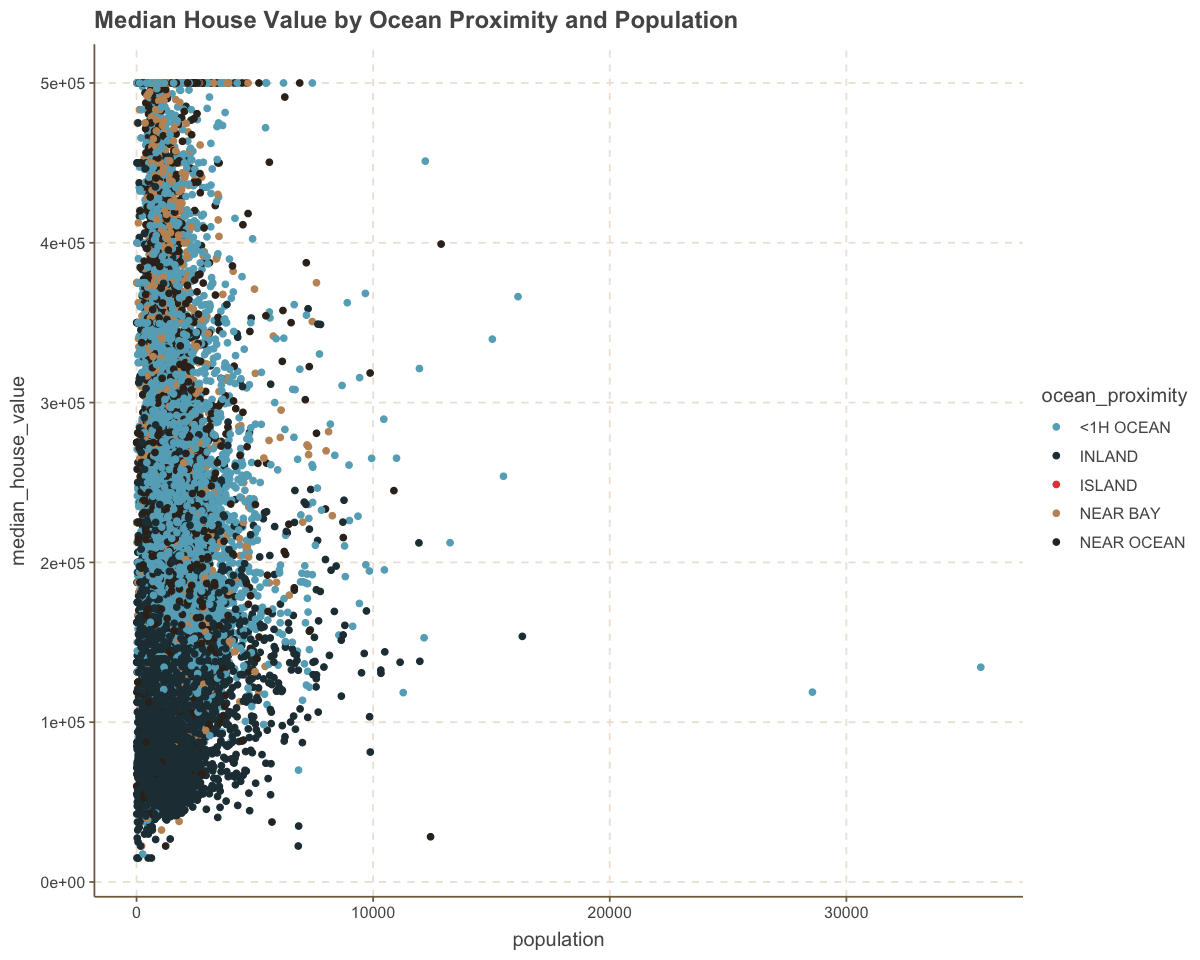

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(housing, aes(x = population, y = median_house_value, color = ocean_proximity)) +
  geom_point(alpha = 2) +   
  ggtitle('Median House Value by Ocean Proximity and Population')

<br>

There are many other ways to explore the dataset. Take some time to evaluate other relationships 


### Implementing Simple Linear Regression

As discussed in the lecture, Simple linear regression is a fundamental technique in predictive modeling that examines the linear relationship between two variables: one independent variable (predictor) and one dependent variable (response). The goal is to model the relationship between these variables by fitting a linear equation to the observed data.

The mathematical formula for simple linear regression is:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

Where:
- $y$ is the dependent variable (response),
- $x$ is the independent variable (predictor),
- $\beta_0$ is the y-intercept of the regression line,
- $\beta_1$ is the slope of the regression line, representing the change in $y$ for a one-unit change in $x$,
- $\epsilon$ is the error term, accounting for the variation in $y$ that cannot be explained by the linear relationship with $x$.

In this section, we will build a simple linear regression model using the California Housing dataset. We will explore how the `tidymodels` and `tidyverse` packages in R can be used to fit the model, evaluate its performance, and interpret the results. Our primary focus will be on predicting the `median_house_value` using relevant predictor variables from the dataset.



<br>

### Building a Model with `tinymodels`

To develop a model, we will use the `tidymodels` framework, which provides a cohesive set of packages for modeling and machine learning. You can learn more about tidymodels at [tidymodels.org](https://tidymodels.tidymodels.org).

The `tidymodels` workflow involves a few key steps:

1. **Specify the model**: Define the type of model you want to build, such as regression or classification.
2. **Specify the engine**: Choose the function or algorithm to use for modeling, such as `lm` for linear regression or `glm` for generalized linear models.
3. **Fit the model and estimate parameters**: Apply the model to your data and estimate the parameters based on the specified engine.

Let's demonstrate how this works:

In [13]:
library(tidymodels)

-- Attaching packages -------------------------------------- tidymodels 1.2.0 --

v broom        1.0.7     v rsample      1.2.1
v dials        1.2.1     v tune         1.2.1
v infer        1.0.7     v workflows    1.1.4
v modeldata    1.4.0     v workflowsets 1.1.0
v parsnip      1.2.1     v yardstick    1.3.1
v recipes      1.1.0     

Warning message:
"package 'broom' was built under R version 4.3.3"
Warning message:
"package 'scales' was built under R version 4.3.3"
Warning message:
"package 'recipes' was built under R version 4.3.3"
-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filter()   masks stats::filter()
x recipes::fixed()  masks stringr::fixed()
x dplyr::lag()      masks stats::lag()
x yardstick::spec() masks readr::spec()
x recipes::step()   masks stats::step()
* Use suppressPackageStartupMessages() to eliminate package startup messages



<br>

### Splitting the Data into Train and Test

A fundamental aspect of statistical modeling is the process of splitting your data into training and testing sets. This allows you to build and validate your model effectively. The training set is used to fit the model, while the testing set is used to evaluate its performance on unseen data. This helps in assessing the model’s generalizability and ensures that it performs well on new data.

Splitting the data into train and test sets involves the following steps:

__Set a Seed for Reproducibility__: Setting a seed ensures that the split is reproducible. <br>
__Use an Initial Split__: Create an initial split of the data, typically into 80% training and 20% testing sets. <br>
__Extract Training and Testing Data__: Separate the data into training and testing sets based on the initial split.

Here is how you can implement this using the tidymodels framework:

In [14]:
# Split the data into training and testing sets
set.seed(503)  # For reproducibility
data_split <- initial_split(housing, prop = 0.8)

# extract training and testing data
train_data <- training(data_split)
test_data <- testing(data_split)

<br>

### Defining Linear Regression Model with `tidymodels`

As noted earlier, Defining a linear regression model using the tidymodels framework involves a few systematic steps. Below is the demonstrate of implementing these steps separated and then collectively

__Specifying the Model__

In [15]:
# Specifying the model
linear_reg()

Linear Regression Model Specification (regression)

Computational engine: lm 


<br>

__Specifying the Engine__

In [16]:
linear_reg() %>% set_engine("lm")  # uses lm: linear model

Linear Regression Model Specification (regression)

Computational engine: lm 


<br>

### Fitting the SLR model 

To fit the model with a specified model and engine, we simply add the fit method to the sequence of model and engine. The model below fits a linear regression of the form:

$$ median\ house \ value = \beta_0 + \beta_1 * median \ income + \epsilon $$

In [17]:
linear_reg() %>% 
   set_engine("lm") %>%
   fit(median_house_value ~ median_income, data = train_data)

parsnip model object


Call:
stats::lm(formula = median_house_value ~ median_income, data = data)

Coefficients:
  (Intercept)  median_income  
        45186          41824  


<br>

We can now see the outcome of the training model with the coefficients and model object presented.

In [18]:
slr_model <- linear_reg() %>% 
               set_engine("lm") %>%
               fit(median_house_value ~ median_income, data = train_data)

<br>

### Regression Output as Tidy Tibble

A useful component of using `tidymodels` is that the tidy opinion is implicit in the operation. This means that we can view the output of a model as a tibble object.

In [19]:
slr_model %>% tidy()

term          estimate std.error statistic p.value     
1 (Intercept)   45185.70 1487.4435  30.3781  2.76119e-197
2 median_income 41823.82  345.3143 121.1181   0.00000e+00

<br>

### Summary of the Model

We can also retrieve the model's summary by plucking the `fit` and piping it to a summary object as shown below.

In [20]:
slr_model %>% pluck('fit') %>% summary()


Call:
stats::lm(formula = median_house_value ~ median_income, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-457077  -55783  -16981   36750  433908 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    45185.7     1487.4   30.38   <2e-16 ***
median_income  41823.8      345.3  121.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 83850 on 16510 degrees of freedom
Multiple R-squared:  0.4705,	Adjusted R-squared:  0.4705 
F-statistic: 1.467e+04 on 1 and 16510 DF,  p-value: < 2.2e-16


<br>

### Model Statistics

Another useful function is the glance function which can extract model statistics.

In [21]:
glance(slr_model)

r.squared adj.r.squared sigma   statistic p.value df logLik    AIC     
1 0.4704871 0.4704551     83853.8 14669.6   0       1  -210622.3 421250.5
  BIC      deviance     df.residual nobs 
1 421273.6 1.160894e+14 16510       16512

<br>

### Augmenting Model Fit

Another important function within the `tidymodels` ecosystem is the `augment` function which returns additional information about the model fit. Specifically, augment adds columns to the original dataset containing predictions, residuals, and other diagnostic metrics. 

In [22]:
train_aug <- augment(slr_model$fit) 
train_aug %>% head()

median_house_value median_income .fitted  .resid     .hat         .sigma  
1 185400             3.2125        179544.7   5855.271 6.791192e-05 83856.33
2 500000             5.1155        259135.5 240864.538 8.683360e-05 83835.38
3 175400             3.4151        188018.2 -12618.235 6.408422e-05 83856.28
4 268400             6.1504        302418.9 -34018.935 1.486844e-04 83855.92
5 180400             3.7167        200632.3 -20232.300 6.096492e-05 83856.19
6 237000             5.6642        282084.2 -45084.193 1.151026e-04 83855.61
  .cooksd      .std.resid 
1 1.655860e-07  0.06982951
2 3.582890e-04  2.87255902
3 7.256522e-07 -0.15048381
4 1.223941e-05 -0.40572357
5 1.774794e-06 -0.24128800
6 1.664018e-05 -0.53768328

<br>

### Visualizing the Model

One of the ways to visualize our model is to plot the regression line against the observation data. This helps in understanding how well the model fits the data and in identifying any deviations or patterns that the model might not have captured.

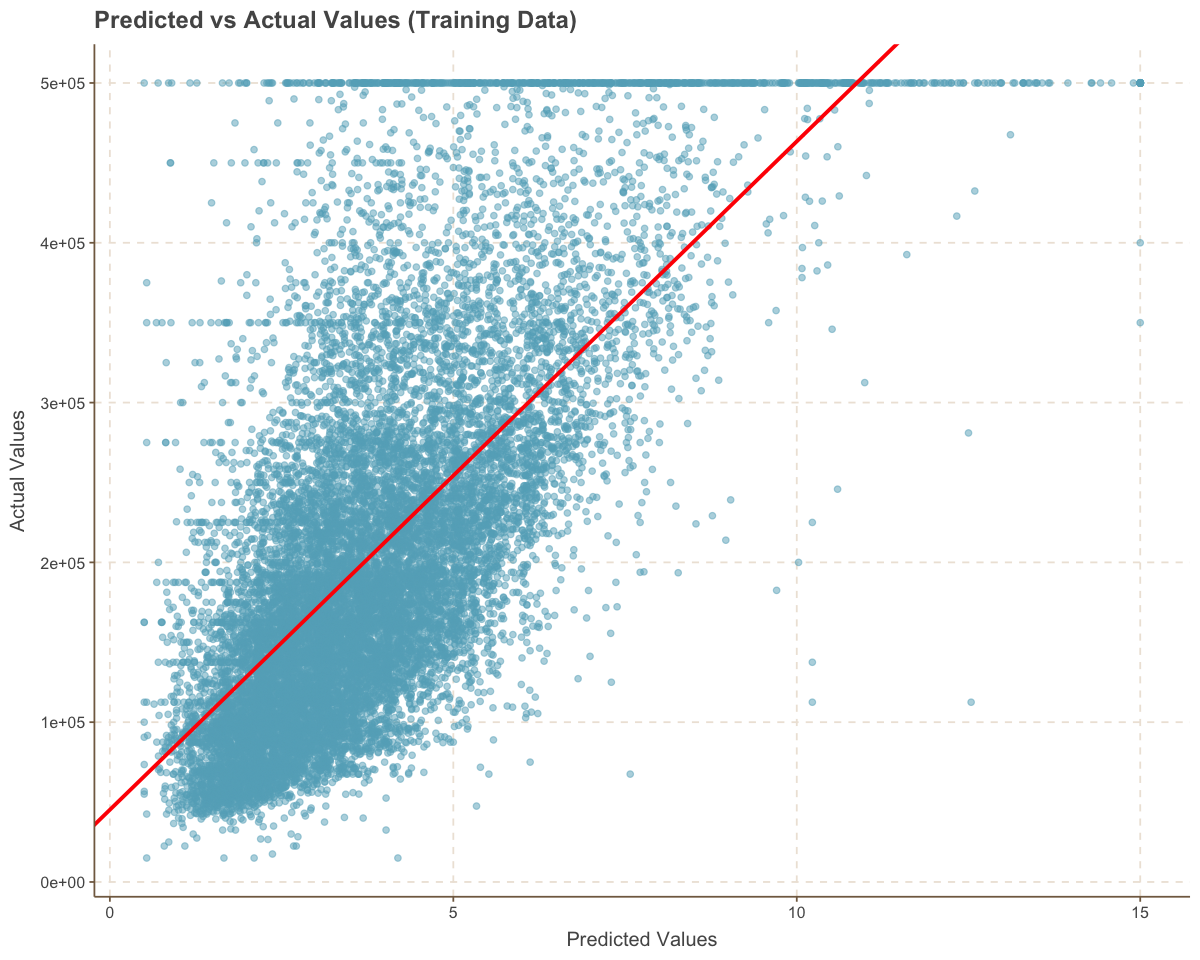

In [23]:
ggplot(train_aug, aes(x = median_income, y = median_house_value)) +
  # scatterplot points
  geom_point(alpha = 0.5) +
  # Passing the coefficients to the the geom line
  geom_abline(slope = 41823.8, intercept = 45185.7, color = 'red', linewidth = 1.09) +
  labs(title = "Predicted vs Actual Values (Training Data)", x = "Predicted Values", y = "Actual Values") 

<br>

### Predicting Values on the Test Set

Now that we have a model generated, we can run predictions on the test set. We utilize the `predict` function as we would in base `R` and pass the new `test_data` as the data source

In [24]:
test_predictions <- predict(slr_model, new_data = test_data)
slice_head(test_predictions, n = 10)

.pred   
1  206048.5
2  199565.8
3  157005.9
4  133860.6
5  145721.8
6  148059.8
7  120803.2
8  125796.9
9  127223.1
10 120338.9

<br>

### Evaluating the Model: Diagnostic Plots

Model diagnostics is an important part of conducting linear regression modeling to understand the validity and reliability of the model. Diagnostic plots help to evaluate whether the assumptions of linear regression are met and to identify potential issues such as non-linearity, heteroscedasticity, and influential data points. Here are key diagnostic plots you should consider:

__Residuals vs. Fitted Values Plot__: This plot helps to identify any systematic patterns in the residuals, which may suggest non-linearity, unequal error variances, or outliers. Ideally, the residuals should be randomly scattered around zero.

__Normal Q-Q Plot__: This plot helps to assess whether the residuals follow a normal distribution. Points should fall approximately along the reference line if the residuals are normally distributed.

__Scale-Location Plot__: Also known as the Spread-Location plot, this helps to check the assumption of homoscedasticity (constant variance of residuals). The residuals should be randomly scattered around the line, indicating consistent variance across fitted values.

__Residuals vs. Leverage Plot__: This plot helps to identify influential data points that have a large impact on the regression model. Points with high leverage and large residuals are potential outliers that may unduly influence the model's results.

<br>

### Linearity Assumption

We first begin by producing a Residual to Fitted Values Plot which helps us assess whether the linearity assumption holds.

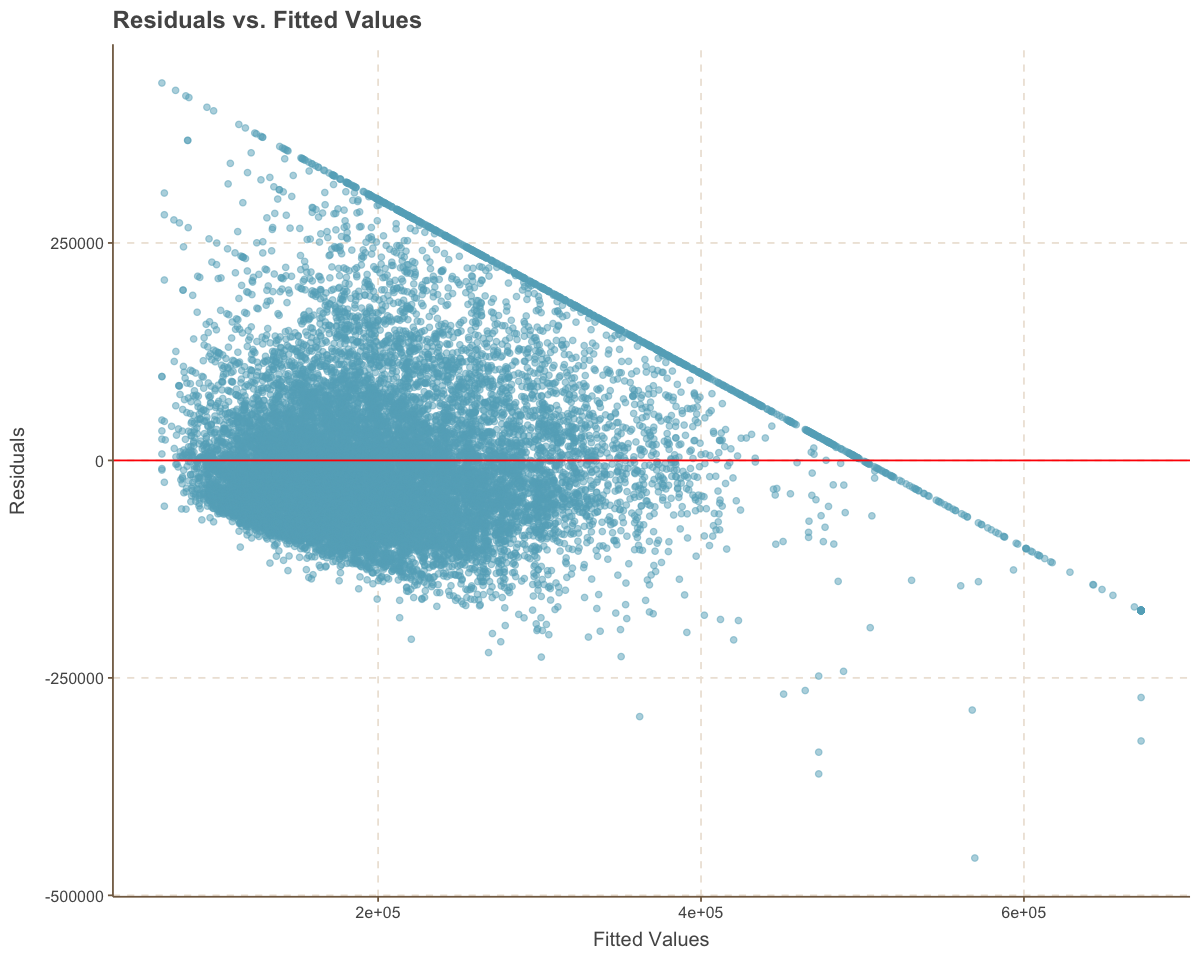

In [25]:
ggplot(train_aug, aes(x = .fitted, y = .resid)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Residuals vs. Fitted Values", x = "Fitted Values", y = "Residuals") 

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### Linearity Assumption

An argument can be made that that data may have a fanning out trend as values increase. However, this is not entirely obvious. There is not a clear pattern in the data overall and therefore, we may not be able to rule out the linearity assumption.


</div>

<br>


<br>

### Normality Assumption 

The normality assumption in linear regression states that the residuals (the differences between observed and predicted values) should follow a normal distribution. This assumption is crucial because it underpins the validity of various statistical tests and confidence intervals associated with the model parameters. We can achieve this both through a Normal Distribution plot or Normal Q-Q Plot.

Warning message:
"package 'patchwork' was built under R version 4.3.3"


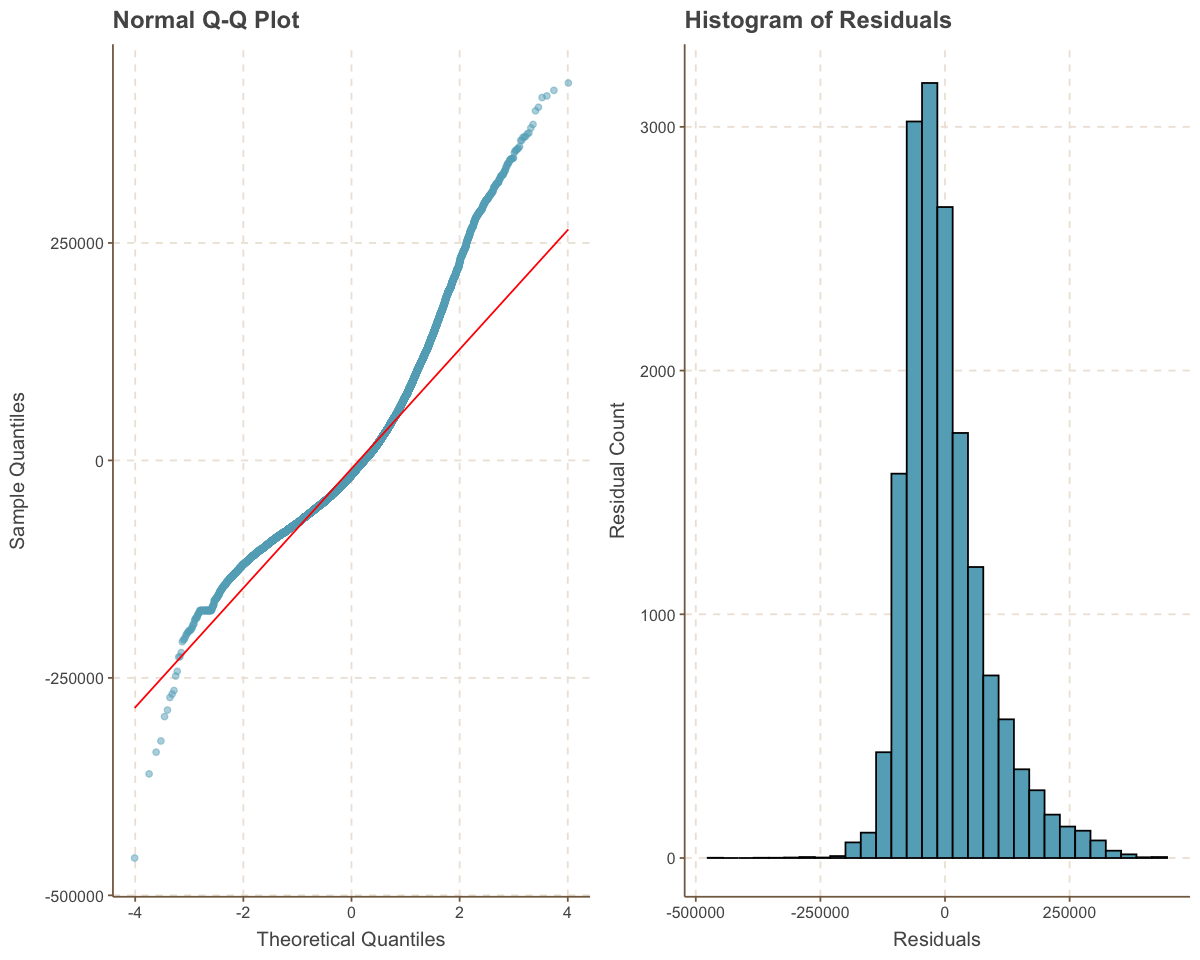

In [26]:
library(patchwork)

qqplot <- ggplot(train_aug, aes(sample = .resid)) +
              stat_qq(alpha = 0.5) +
              stat_qq_line(color = "red") +
              labs(title = "Normal Q-Q Plot", x = "Theoretical Quantiles", y = "Sample Quantiles")

normal_dist <- ggplot(train_aug, aes( x = .resid )) +
                geom_histogram(bins = 30, color = 'black') +
                labs(title = "Histogram of Residuals", x = "Residuals", y = "Residual Count")

# Combining Normal Q-Q Plot
gridExtra::grid.arrange(qqplot,normal_dist, ncol = 2)

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### Normality of Residuals

Based on the Normal Q-Q plot and the Histogram, the residuals are not strictly normally distributed. This is observed by the Normal Q-Q plot with values outside the normal distribution line. Deviation from the normal line might be a result of outliers and may reflect skewness of the residuals which is also observed in the histogram.

To Address Normality, we could implement transformation on the dependent variable such as a log tranformation to reduce the overall scale of the data.

</div>

<br>

### Constant Variance 

The constant variance assumption, also known as homoscedasticity, is an important assumption in linear regression. It states that the variance of the residuals should be constant across all levels of the independent variable(s). We can assess this also using the Residual to Dependent Variable plot.

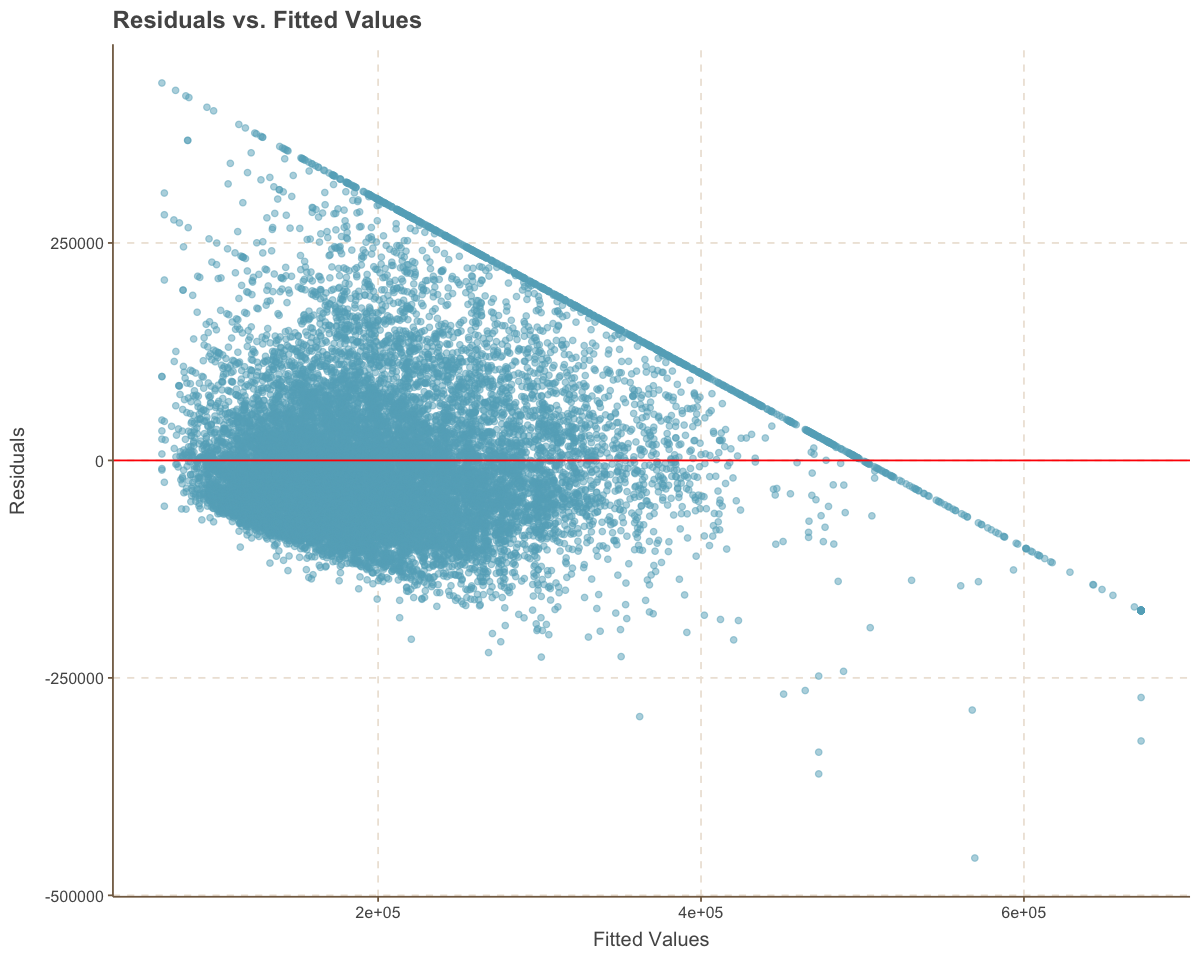

In [27]:
ggplot(train_aug, aes(x = .fitted, y = .resid)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Residuals vs. Fitted Values", x = "Fitted Values", y = "Residuals") 

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### Homoskedasticity - Constant Variance

The Fitted Values vs. Residuals plot indicates a pattern of increasing variance as the fitted values increase, suggesting heteroscedasticity, where the variance of residuals grows with the predicted values. This fanning-out pattern can be problematic for model reliability. Additionally, there are unusual negative linear patterns present, which may be caused by outliers.

To address these issues, applying a transformation to the dependent variable could help stabilize the variance and mitigate the effects of outliers.
</div>

<br>

### Evaluate the Model - $R^2$ and $MSE$

Evaluating the performance of a linear regression model involves assessing how well the model explains the variability in the dependent variable and how accurately it predicts new data. Two common metrics for this purpose are the coefficient of determination $R^2$ and the Mean Squared Error $MSE$


### Calculating $R^2$

The $R^2$  value, also known as the coefficient of determination, is a measure of how well the regression model explains the variability in the dependent variable. It can be calculated using the following formula:

$$R^2 = 1 - \frac {RSS} {TSS}$$
 

Where:

$RSS$ (Residual Sum of Squares) is the sum of the squares of the residuals, which represent the difference between the observed and predicted values. <br>

$TSS$ (Total Sum of Squares) is the total variance in the observed data, representing the difference between the observed values and the mean of the observed values. <br>

This formula indicates that $R^2$ is the proportion of the total variance in the dependent variable that is explained by the independent variables in the model. An $R^2$  value closer to 1 indicates a better fit of the model to the data.

<br>

### Extracting R-Squared from `tinymodels`

Below is an example of how to extract $R^2$ from the model object.

In [28]:
train_aug %>% rsq( truth = median_house_value, estimate = .fitted ) 

.metric .estimator .estimate
1 rsq     standard   0.4704871

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### $R^2$ Intepretation

The model explains 47.05% of the variance in the $median_house_value$. This means that $median_income$ accounts for nearly half of the observed variability in median house prices/value.

</div>

<br>

<br>

### Root Mean Square Error (RMSE)

The Root Mean Squared Error (MSE) is a widely used metric for evaluating the performance of regression models. It measures the square root average of the squares of the errors, which are the differences between the observed values and the predicted values. RMSE is useful for assessing how well a regression model fits the data and for comparing the performance of different models.

__Formula__

The formula for MSE is: $ \sqrt( \frac{1}{n} \sum^{n}_{i=1} (y_i - \hat y_i)^2 )$


Where: <br>
$y_i$​ are the observed values. <br>
$\hat y_i$  are the predicted values. <br>
$n$ is the number of observations.

__Interpretation__

__Low RMSE__: A lower MSE value indicates that the model's predictions are close to the actual observed values, implying a better fit. <br>
__High RMSE__: A higher MSE value suggests that the model's predictions deviate significantly from the observed values, indicating a poorer fit. <br>

<br>

### Extracting MSE from `tinymodels`

We can extract the rmse using the following implementation.

In [29]:
train_aug %>% metrics(truth = median_house_value, estimate = .fitted) 

.metric .estimator .estimate   
1 rmse    standard   8.384872e+04
2 rsq     standard   4.704871e-01
3 mae     standard   6.271620e+04

<br>

## Multiple Linear Regression

The above sections delved into the Simple Linear Regression to explore the fundamental concepts of applying regression to datasets. In the following section, we will extend to MLR (Multiple Linear Regression). Because we have covered core concepts above, the next section will focus on the application of `tinymodels` to Multiple Linear Regression. 

__We begin by dropping na values and plotting correlation pairs__

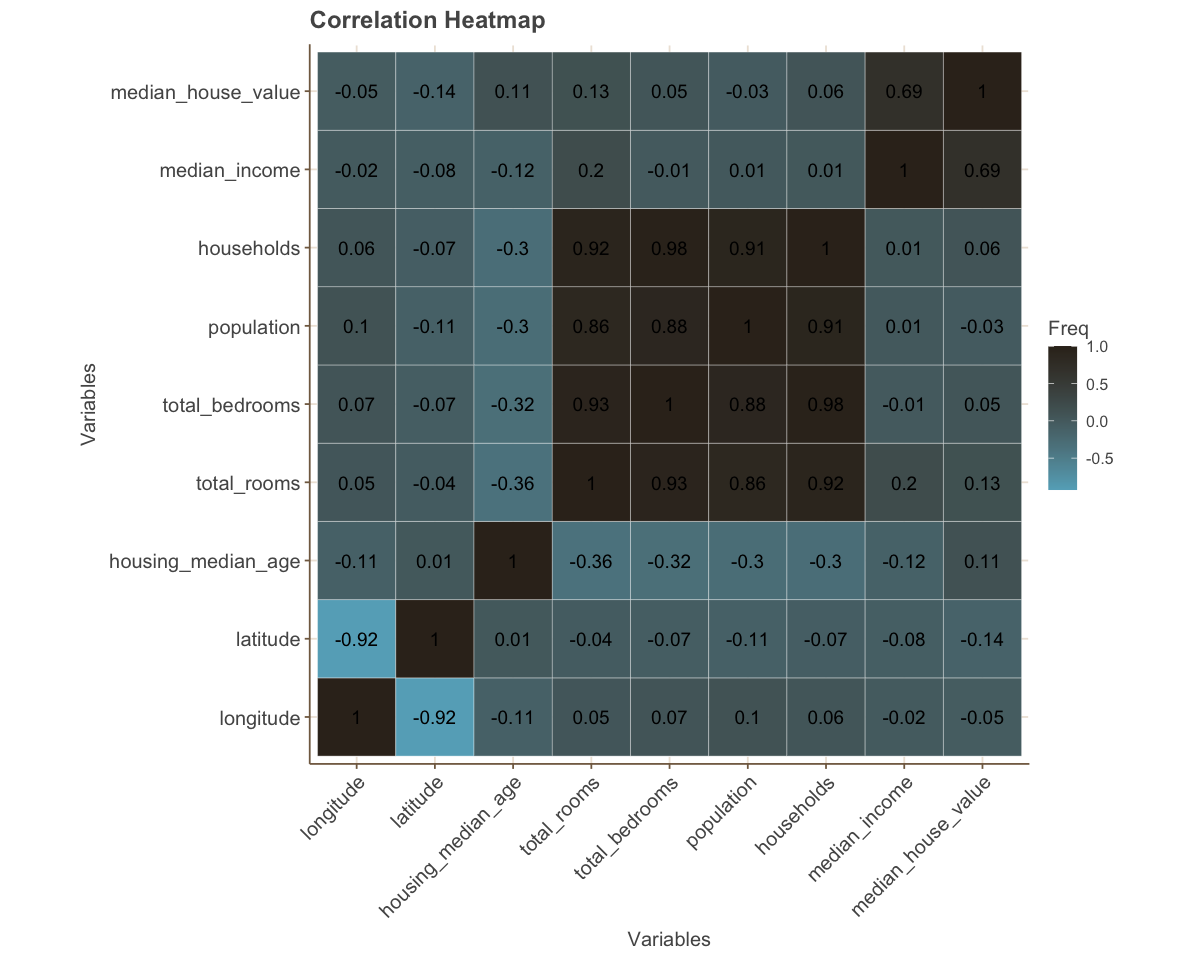

In [30]:
housing_numeric <- housing %>% drop_na() %>% select_if(is.numeric)

# Compute the correlation matrix
correlation_matrix <- cor(housing_numeric, use = "complete.obs")

# Convert the correlation matrix to a long format for ggplot2
correlation_long <- as.data.frame(as.table(correlation_matrix))

# Plot the correlation heatmap
ggplot(correlation_long, aes(Var1, Var2, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(Freq, 2)), color = "black", size = 4) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1),
        axis.text.y = element_text(size = 12)) +
  coord_fixed() +
  ggtitle('Correlation Heatmap of Numeric Variables') +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables")

<div class="alert alert-block alert-info" style="background-color:white">

#### Correlation Heatmaps

1. We see that median_house_value has a relatively strong relationship with median_income. The linear relationship against other variables exists but is a rather weak relationship. 

2. We also notice that Total Rooms, Bedrooms, Population, and Households are highly positively linearly correlated. This may require us to select one of the features that may serve as proxy for others.

3. Most other correlations are very weak .
</div>

<br>

### Building an MLR Model

In the next section, we implement an MLR of the form:

$$ median\_house\_value = \beta_0 * median\_income + \beta_1 * population + \beta_2 * total\_bedrooms $$

In [31]:
# Developing the model
mlr_model <- linear_reg() %>%
             set_engine("lm") %>%
             fit(median_house_value ~ median_income + population + total_bedrooms, data = train_data)

# return the model params in tidy version
tidy(mlr_model)

term           estimate    std.error   statistic p.value      
1 (Intercept)    40684.80108 1681.723735  24.19232 4.553314e-127
2 median_income  42156.71836  337.809759 124.79426  0.000000e+00
3 population       -34.31120    1.162818 -29.50694 1.758850e-186
4 total_bedrooms    96.76685    3.163564  30.58792 7.292294e-200

<br>

As seen above, we have the model coefficients for the Multiple Linear Regression in a `tidy` format which can be extracted with far more ease.

<br>

#### Viewing Model Performance Metrics

As we have seen earlier, we can then return the model parameters with the key function `glance`. This allows use to get all the model parameters in a `tidy` format for which we can extract the parameter values.

In [32]:

glance(mlr_model)

r.squared adj.r.squared sigma    statistic p.value df logLik    AIC     
1 0.5002567 0.500165      81501.51 5453.598  0       3  -208064.2 416138.3
  BIC      deviance    df.residual nobs 
1 416176.8 1.08565e+14 16344       16348

<br>

### Lab Assignments

In this lab, we introduced how to perform linear regression using `tidymodels`. We demonstrated how to extract model parameters, assess regression assumptions, and run predictions. Your assignment is to replicate the model assessment, parameter extraction, and predictions based on the steps we covered for __Multiple Linear Regression__. Think about the following questions as you complete the assignment:

1. **Assumptions of a Linear Regression Model**:
   - What are the assumptions of a linear regression model?
   - What plots can we use to assess these assumptions? (e.g., Residuals vs. Fitted values, Q-Q plot, Scale-Location plot, Residuals vs. Leverage plot)

2. **Statistical Significance**:
   - Are the parameters in the model statistically significant?
   - Is the overall model statistically significant? (Consider p-values and confidence intervals for the coefficients, and the F-test for the overall model significance)

3. **Predictions and Comparisons**:
   - Generate predictions from the test set using multiple linear regression (MLR).
   - Compare the predicted values with the actual values using a scatter plot.
   - Evaluate the performance using metrics such as RMSE and \(R^2\).
